# I. Relevant imports

In [27]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates
from code_ref import usd_conv

# II.Data Cleaning

Loading main dataset resulting from API pull

In [28]:
findata = pd.read_csv('metric_final_set.csv')

Some primary feature selection - we are looking to simplify the dimensionality of the dataset and focus on key investment features
    
 - This list is not exhaustive and may have some selection bias. We believe these metrics can lead us to extract information from company clusters.

In [29]:
findata1 = findata[['symbol','metric.netIncomeEmployeeAnnual', 'metric.revenueEmployeeAnnual','metric.receivablesTurnoverAnnual','metric.freeOperatingCashFlow/revenue5Y',
"metric.freeOperatingCashFlow/revenueTTM", 'metric.grossMargin5Y', 'metric.grossMarginAnnual',
'metric.netProfitMargin%Annual',
'metric.netProfitMargin5Y',
'metric.dividendGrowthRate5Y',
'metric.focfCagr5Y',
'metric.revenueGrowth5Y',
'metric.totalDebtCagr5Y',
'metric.netDebtAnnual',
'metric.peNormalizedAnnual',
'metric.pfcfShareAnnual',
'metric.currentEv/freeCashFlowAnnual',
'metric.freeCashFlowAnnual',
'metric.longTermDebt/equityAnnual',
'metric.netInterestCoverageAnnual',
'metric.payoutRatioAnnual',
'metric.quickRatioAnnual',
'metric.totalDebt/totalEquityAnnual',
'metric.dividendYield5Y',
'metric.dividendYieldIndicatedAnnual',
'metric.capitalSpendingGrowth5Y',
'metric.inventoryTurnoverAnnual',
]]

findata1.shape

(8831, 28)

Preliminary data observation highlight a large number of null values

In [30]:
findata1.sample(n=10)

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.freeCashFlowAnnual,metric.longTermDebt/equityAnnual,metric.netInterestCoverageAnnual,metric.payoutRatioAnnual,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual
1322,INTC,192923.90,659624.2,10.00834,12.36248,15.77989,61.15430,58.55624,29.24755,24.51891,...,11356.000,32.58862,NaN,26.50133,1.00829,37.34403,2.46945,2.43857,9.71808,3.72882
2567,RE,668960.30,5468568.0,NaN,14.96439,19.60333,NaN,NaN,12.23282,10.72424,...,1617.680,6.94008,36.33544,23.47488,NaN,6.94008,2.22352,3.48275,NaN,NaN
6547,0396.HK,NaN,NaN,3.80811,NaN,NaN,19.32013,10.47071,-35.14270,-8.19765,...,NaN,0.22105,-26.47321,NaN,1.54938,18.93604,NaN,NaN,NaN,12.48763
2026,ICLR,26543.50,198152.5,3.24713,13.14142,12.89796,35.68270,29.64190,13.39549,14.32404,...,361.896,0.00000,67.54028,0.00000,NaN,21.60866,NaN,NaN,9.09081,NaN
1719,601857.SS,143039.00,5372364.0,40.69018,1.38666,-0.58272,14.99823,13.88400,2.66250,2.43464,...,-14666.000,36.98103,8.08700,52.08967,0.43088,51.31637,1.60061,3.62095,0.90578,12.05779
2509,MCON.L,NaN,NaN,6.02796,-3.82184,-1.01095,37.93850,34.57917,10.00687,11.10919,...,-1.251,8.70118,15.08235,35.93507,1.99233,11.93483,2.13497,2.41379,31.60023,1.65304
5695,AIF.TO,7277.60,226966.0,3.37493,5.33105,4.80865,NaN,NaN,3.20647,5.49730,...,27.285,17.72630,4.70860,131.67530,NaN,59.57036,2.01464,1.62162,-11.21062,NaN
1774,CRG.IR,16414.17,251814.2,7.51353,3.97393,6.57806,32.81299,32.98579,6.51837,5.55016,...,1457.228,55.72019,9.42105,40.37037,1.18307,62.13105,2.35394,3.45836,23.08710,5.80389
7583,FDM.L,NaN,NaN,8.36413,3.51340,3.57310,45.85368,48.45744,14.96231,14.34378,...,9.702,23.28946,84.00474,43.00066,NaN,30.85634,2.84969,2.21607,35.20767,NaN
2825,0576.HK,NaN,NaN,42.36144,NaN,NaN,49.24546,44.11697,36.92849,37.75113,...,-2490.485,102.75830,NaN,41.54559,1.36583,179.38340,5.29936,7.71318,-4.41292,27.12531


# III. Currency Conversion - Net Debt & Free Cash Flow

Net Debt / Free Cash Flow are in local CCY. We need to convert them into USD to include these features in the clusters.

In [31]:
tick_conv = pd.read_csv('tickers_final.csv')

In [32]:
conv = pd.merge(findata1, tick_conv, left_on = 'symbol', right_on = 'Ticker').drop(columns = ['Ticker', 'Unnamed: 0'])

In [33]:
conv.sample()

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual,Name,Exchange,Category Name,Country
3190,TNET,70666.66,1285333.0,12.66338,6.91591,11.04772,17.0992,17.73859,5.49793,3.88355,...,NaN,82.31579,NaN,NaN,16.96924,NaN,"TriNet Group, Inc.",NYQ,Business Services,USA


In [34]:
country_ccy = pd.DataFrame(conv.Country.unique(), columns = ['country'])

In [35]:
mapping = {'USA': 'USD', 'Australia': 'AUD', 'Germany': 'EUR', 'France': 'EUR', 'Canada':'CAD',
           'United Kingdom': 'GBP', 'Norway': 'NOK', 'Sweden': 'SEK', 'Denmark': 'DKK', 'Singapore': 'SGD', 'Netherlands':'EUR', 'Hong Kong':'HKD', 'Spain': 'EUR', 'Italy':'EUR', 'Belgium': 'EUR'}

In [36]:
country_ccy['ccy'] = country_ccy.country.map((mapping))

In [37]:
country_ccy['ref_ccy'] = 'USD'

In [38]:
def usd_conv(row):
    c = CurrencyRates()
    return c.get_rate(row['ref_ccy'],row ['ccy'])

In [39]:
country_ccy['rate_vs_usd'] = country_ccy.apply(usd_conv, axis =1)
country_ccy

,country,ccy,ref_ccy,rate_vs_usd
0,USA,USD,USD,1.000000
1,Australia,AUD,USD,1.605227
2,Germany,EUR,USD,0.920217
3,France,EUR,USD,0.920217
4,Canada,CAD,USD,1.404712
5,United Kingdom,GBP,USD,0.805788
6,Norway,NOK,USD,10.319591
7,Sweden,SEK,USD,10.072237
8,Denmark,DKK,USD,6.870065
9,Singapore,SGD,USD,1.424404


In [42]:
df_w_rate = pd.merge(conv, country_ccy, left_on = 'Country', right_on = 'country')
df_w_rate[['metric.freeCashFlowAnnual','metric.netDebtAnnual', 'metric.revenueEmployeeAnnual', 'metric.NetIncomeEmployeeAnnual']] = df_w_rate[['metric.freeCashFlowAnnual','metric.netDebtAnnual','metric.revenueEmployeeAnnual', 'metric.netIncomeEmployeeAnnual']].divide(df_w_rate['rate_vs_usd'], axis = 0)

In [16]:
df_w_rate.sample(n=10)

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual,Name,Exchange,Category Name,Country,country,ccy,ref_ccy,rate_vs_usd
2348,HIIQ,NaN,NaN,NaN,1.50023,-12.72001,NaN,NaN,9.62002,8.59335,...,106.43260,NaN,"Health Insurance Innovations, Inc.",NGM,Health Care Plans,USA,USA,USD,USD,1.000000
959,MCK,2126.582,2712899.0,14.88585,1.58505,1.25675,5.75460,5.48435,0.07839,0.91350,...,6.06239,12.26960,McKesson Corporation,NYQ,Drugs Wholesale,USA,USA,USD,USD,1.000000
10,ABT,34295.240,303847.6,6.01565,6.63616,6.98345,57.21955,58.63842,11.28699,8.80577,...,8.74759,3.25345,Abbott Laboratories,NYQ,Medical Appliances & Equipment,USA,USA,USD,USD,1.000000
5400,BRBY.L,33136.270,265813.3,21.25156,8.25834,6.32056,69.54492,68.40673,12.46600,11.79688,...,-6.40624,1.96009,Burberry Group plc,LSE,Jewelry Stores,United Kingdom,United Kingdom,GBP,USD,0.805788
1836,NBL,-621422.400,1924545.0,6.59435,-21.43068,-16.96710,86.09610,80.59937,-32.28932,-32.96158,...,-12.32127,13.66667,"Noble Energy, Inc.",NYQ,Independent Oil & Gas,USA,USA,USD,USD,1.000000
2538,NOW,67659.700,373596.4,4.90811,21.25349,25.96178,74.50386,76.97849,18.11037,-1.24735,...,44.07524,NaN,"ServiceNow, Inc.",NYQ,Information Technology Services,USA,USA,USD,USD,1.000000
3005,RVP,NaN,NaN,6.64304,-11.16190,-0.19708,32.85889,30.71944,-4.02690,-4.09678,...,-8.91050,3.35284,"Retractable Technologies, Inc.",ASE,Medical Instruments & Supplies,USA,USA,USD,USD,1.000000
7632,0100.HK,NaN,NaN,1.73069,-0.51842,19.66933,40.72440,30.85548,-5.81928,12.22195,...,4.46831,NaN,CLEAR MEDIA,HKG,Advertising Agencies,Hong Kong,Hong Kong,HKD,USD,7.753658
2709,SRI,12965.810,179417.0,6.00986,3.89040,-1.79338,28.24878,25.61858,7.22663,6.39094,...,9.77861,7.18540,"Stoneridge, Inc.",NYQ,Auto Parts,USA,USA,USD,USD,1.000000
2634,OIIM,NaN,NaN,5.60954,NaN,NaN,51.36681,52.46849,-8.27042,-11.23696,...,NaN,3.03500,O2Micro International Limited,NMS,Diversified Electronics,USA,USA,USD,USD,1.000000


In [43]:
df_w_rate.shape

(8647, 37)

# IV. KNN Imputation

   - We elected KNNImputer to fill in missing values with the rationale that similar companies in terms of ratios would be grouped within the matrix dimensions and provide accurate inputs that would not affect the clustering outcomes. 20 nearest neighbors should preserve the accuracy of the data and avoid adding too much variance to the data.

In [44]:
Xalt = df_w_rate.iloc[:,1:28]

In [45]:
imputer = KNNImputer(n_neighbors = 20)
complete1 = imputer.fit_transform(Xalt)


In [46]:
df = pd.DataFrame(complete1, index = [df_w_rate.index, df_w_rate.iloc[:,0]], columns = Xalt.columns).reset_index()
df.drop(columns = ['level_0'], inplace = True)

We now have a complete DataSet to start modelling on. 

In [47]:
df.sample(n=10)

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.freeCashFlowAnnual,metric.longTermDebt/equityAnnual,metric.netInterestCoverageAnnual,metric.payoutRatioAnnual,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual
1651,HGSH,2.607162e+04,2.786983e+05,3.134430,-28.64164,24.39244,30.199400,23.554280,9.35478,19.59655,...,8.937580,18.566380,46.967400,0.000000,1.121645,68.636700,2.511637,3.417750,8.445792,39.800647
666,SBSI,8.955435e+04,2.548625e+05,33.704298,24.78460,10.46410,50.322302,49.545743,35.13831,31.10463,...,22.202000,19.740240,24.161423,57.033830,1.479098,23.264810,3.250290,4.542120,25.205360,9.860570
7055,ACOMO.AS,4.777083e+04,1.134309e+06,7.879500,1.14500,5.00969,16.981230,18.784470,4.57658,4.67049,...,29.709291,7.314410,10.146680,84.484210,0.694170,41.152150,4.274170,6.883600,24.023510,4.020050
4731,ALMNG.PA,-4.350603e+05,2.516258e+05,2.510720,-7.20859,-2.90206,24.113170,25.997420,-10.74278,-13.54842,...,-0.415119,7.842009,-11.694210,39.280668,2.248222,29.620151,0.000000,8.083984,48.309000,8.344309
3327,KSN.AX,-6.027582e+04,4.741492e+05,0.608880,-5270.05200,-12825.21000,-631.074259,-347.525051,-3539.28000,-5841.49100,...,-4.000481,0.304890,-14.940140,27.561162,2.231683,0.668110,3.270656,5.598942,53.250380,25.076649
4501,ALO.PA,7.068537e+03,2.480163e+05,2.649600,-9.77969,-15.61814,16.073030,17.727950,3.09713,-3.73798,...,68.462100,6.990960,8.042250,283.983300,0.927040,32.217060,4.536880,5.484940,-19.450590,4.133830
4063,JPR.AX,-8.181895e+05,2.194094e+05,73.375330,-125.69450,-11.73979,46.279950,62.029130,-99.60116,-307.21910,...,-0.655546,77.609066,0.194530,24.669263,0.184750,96.662457,2.532017,6.672302,10.812420,95.283590
3312,CHC.AX,5.247286e+06,7.011221e+06,6.282160,11.02791,9.59613,93.762190,83.408190,62.56275,94.68952,...,22.239848,15.579180,28.293624,66.680830,1.901670,15.971930,4.296640,4.921990,7.033700,15.334414
3663,RDS.AX,-8.249090e+04,4.512935e+05,8.592970,-1438.24900,-968.96200,-318.375300,-120.963700,-302.12580,-679.22280,...,-0.195113,0.000000,-141.855700,34.203823,4.191443,0.000000,3.128960,5.869612,-28.233340,30.819814
3992,MEP.AX,-1.077624e+06,1.530687e+05,3.909800,-2350.53600,-3309.87900,-104.495300,-95.806190,-1334.99100,-1830.91300,...,-5.741519,10.872250,-745.812268,27.561162,3.582677,11.166890,3.927614,5.598942,1.867000,26.289675


In [48]:
df.to_csv('clean_data.csv')

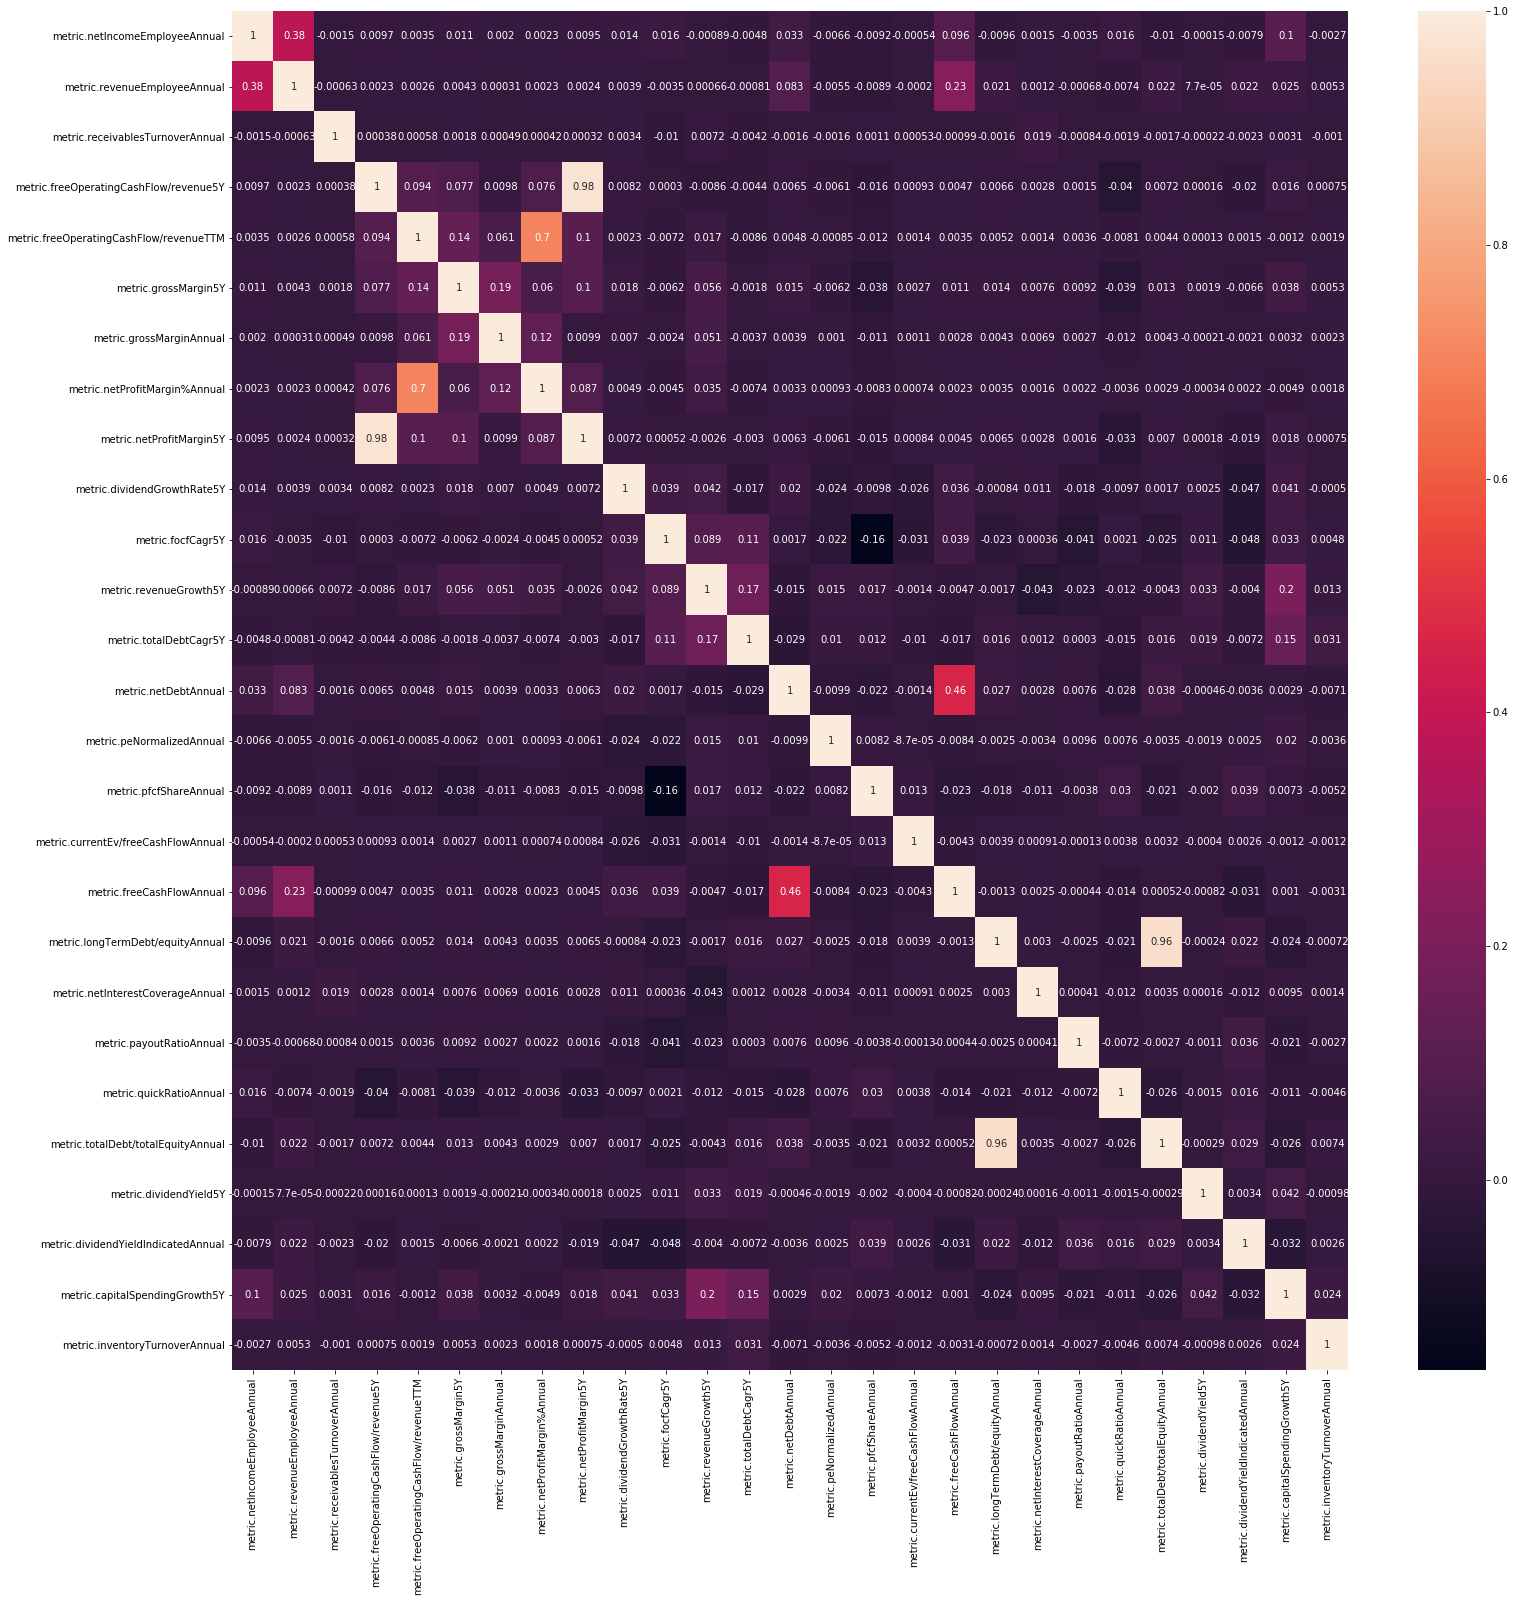

In [49]:
plt.figure(figsize = [25,25])
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corr = sns.heatmap(df.iloc[:,1:28].corr(), annot=True);

In [50]:
plt.savefig('visualizations/clean_data_corr_hm.png')

<Figure size 432x288 with 0 Axes>